## Funcion exponencial

Mientras que el modelo logístico describe un crecimiento de infección que se detendrá en el futuro, el modelo exponencial describe un crecimiento de infección imparable . Por ejemplo, si un paciente infecta a 2 pacientes por día, después de 1 día tendremos 2 infecciones, 4 después de 2 días, 8 después de 3 y así sucesivamente.

In [208]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [209]:
# Actualizar los datos (URL)

url = 'covid.csv'

df = pd.read_csv(url)
df


,date,cases_confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
75,2020-04-06,3747
76,2020-04-07,3747
77,2020-04-08,4450
78,2020-04-09,4965


In [210]:

FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
confirmed = list(df.iloc[:, 1])
ndias=list(df['date'])
df

,date,cases_confirmed
0,21,0
1,22,0
2,23,0
3,24,0
4,25,0
...,...,...
75,96,3747
76,97,3747
77,98,4450
78,99,4965


In [211]:
def exponencial(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3
g = [100, 0.01, 200, 0.01]
n = len(ndias)
y = np.empty(n)
predi = n


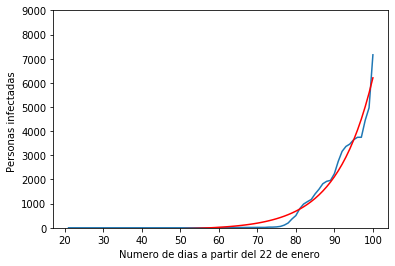

In [212]:
for i in range(n):
    y[i] = exponencial(ndias[i], g[0], g[1], g[2], g[3])
    popt, pcovid = curve_fit(reg_exponencial, ndias, confirmed, g)
for i in range(predi):
    y[i] = exponencial(ndias[i], popt[0], popt[1], popt[2], popt[3])
plt.ylim(0,150)
plt.ylim(0,9000)
plt.plot(ndias, confirmed)
plt.xlabel("Numero de dias a partir del 22 de enero ")
plt.ylabel("Personas infectadas ")
plt.plot(ndias, y, 'r')


## Modelo polinomial


Modelo polinomial
Predicción de una variable de respuesta cuantitativa a partir de una variable predictora cuantitativa, donde la relación se modela como una función polinomial de orden n (esto significa que pueden tener de diferentes exponenciales o grados y se debe ir probando)

Se puede tener una ecuacion con diferentes grados

y = a0 + a1x + a2x^2 + a3x^3 + … + anx^n + ε

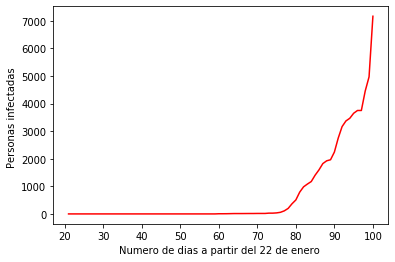

In [230]:
ndias=list(df['date'])
x = np.array(ndias).reshape(-1, 1)
y = np.array(confirmed).reshape(-1, 1)
plt.xlabel("Numero de dias a partir del 22 de enero ")
plt.ylabel("Personas infectadas ")
plt.plot(x, y, 'r-')


## Conclusiones

Gracias a los modelos matematicos exponencial y polinomial se puede se pueden realizar predicciones en cuanto a la enfermedad de alto contagio por la que esta pasando el Ecuador, los modelos muestran las tasas de crecimiento del avance de esta enfermedad.
Podemos decir que el modelo exponencial da una mejor referencia con respecto a la tasa de contagiados ya que presenta una curva que crece de acuerdo a sus estadisticas, el modelo polinomial tambien es importante, pero este nos da prediccion certera de acuerdo a sus puntos.

## Criterio Personal

A poco más de dos meses del primer caso confirmado de COVID-19 en el Ecuador, se registran 297 víctimas mortales y 7161 casos de contagio, 68% de los cuales son residentes en el Guayas, epicentro del virus en el país.
Las cifras parecen haber crecido disparatadamente en los últimos días, ¿El decreto de cuarentena a nivel nacional no está dando resultados? o ¿Es acaso un intento desesperado del estado por encajar números reales entre los registros “oficiales”?
Desde mediados de marzo el gobierno implementó un paquete de medidas a su pueblo con la intención de frenar la propagación del virus; desde la limitación de reuniones sociales, la suspensión de la asistencia a centros educativos y de recreación, que pronto evolucionaría  hasta la restricción vehicular y toque de queda a nivel nacional. 
Sin haber conseguido los resultados esperados, al día de hoy, el gobierno ecuatoriano toma medidas desesperadas para tratar de hacer frente a esta emergencia sanitaria; ajuste legal para retraso en pago de arriendos y de seguros de salud; La creación de una cuenta nacional de asistencia humanitaria que se financiará con el aporte de empresas grandes y de ciudadanos que ganen más de 500 dólares mensuales, quienes otorgarán el 5% de sus utilidades; estas medidas, como era de esperarse, resultaron en el descontento de la ciudadanía.
El reclamo de los ecuatorianos hacia el primer mandatario Lenín Moreno y la ministra de gobierno María Paula Romo, llegan a medios internacionales con imágenes de centros de salud repletos, tanto como de cuerpos sin vida en las calles de Guayaquil, víctimas letales de la ineficacia del sistema de salud público gubernamental. El gobierno de turno continúa responsabilizando al pasado régimen político de Rafael Correa Delgado de de la situación de crisis económica en el país y en palabras del Presidente de la república “La emergencia podría convertirse en una tragedia social por la falta de empleo, ingresos y alimentos.”